In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score,  mean_squared_error


%matplotlib inline

In [2]:
housing = pd.read_csv('datasets/train.csv') #sat_2017 =pd.read_csv("data/sat_2017.csv")

In [3]:
housing_test=pd.read_csv('datasets/test.csv')

In [4]:
N = housing.loc[:,("SalePrice","Gr Liv Area","Total Bsmt SF","Neighborhood")]

In [5]:
N_sub = housing_test.loc[:,("Gr Liv Area","Total Bsmt SF","Neighborhood")]

In [7]:
N_sub.loc[:, "Total Bsmt SF"] = N_sub.loc[:, "Total Bsmt SF"].fillna(0)

ValueError: x and y must be the same size

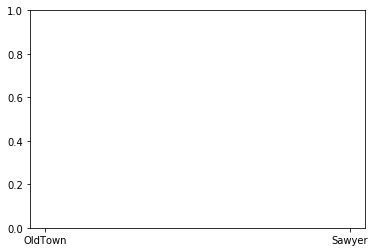

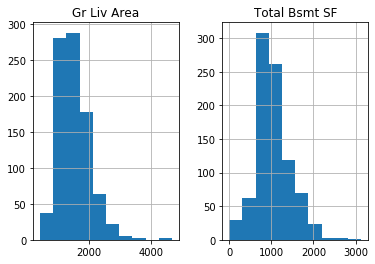

In [ ]:
N_sub=pd.get_dummies(N_sub, columns =["Neighborhood"], drop_first = True)

In [ ]:
N=pd.get_dummies(N, columns =["Neighborhood"], drop_first = True)

In [ ]:
total = N.isnull().sum().sort_values(ascending=False)

In [ ]:
total

In [ ]:
N.loc[:, "Total Bsmt SF"] = N.loc[:, "Total Bsmt SF"].fillna(0)

In [ ]:
features = [col for col in N._get_numeric_data().columns if col != 'SalePrice']
X = N[features]
y = N['SalePrice']

In [ ]:
#missing_features = list(set(X.columns.values)-set(X_sub.columns.values))

In [ ]:
#X = X.drop(missing_features, axis =1)

In [ ]:
#missing_features = list(set(N_sub.columns.values)-set(X.columns.values))
#N_sub= N_sub.drop(missing_features, axis =1)

In [ ]:
diff = (columns).difference(kaggle_dummies.columns)

In [ ]:
for x in diff:
    kaggle_dummies[x] = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


In [ ]:
lr = LinearRegression()

In [ ]:
lasso = LassoCV(n_alphas=200)

In [ ]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [ ]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

In [ ]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

In [ ]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

In [ ]:
ridge.fit(X_train, y_train)

In [ ]:
ridge.score(X_test, y_test)

In [ ]:
ridge_scores.mean()

In [ ]:
pred = ridge.predict(N_sub_sc)

In [ ]:
pred.mean()

In [ ]:
X.shape

In [ ]:
X.columns

In [ ]:
r2_score(y_test, pred)

In [ ]:
mse =mean_squared_error(y_test, pred)

In [ ]:
rmse = np.sqrt(mse)

In [ ]:
rmse

In [ ]:
#pipe = Pipeline([
    #('var_thresh', VarianceThreshold(.01)),
    #('ss', StandardScaler()),
    #('kbest', SelectKBest(f_regression, k=95)),
    #('lasso', Lasso())
#])

In [ ]:
#pipe.fit(X_train, y_train)

In [ ]:
#pipe.score(X_train, y_train)

##### Submission data

In [ ]:
N_sub = housing_test.loc[:,("Gr Liv Area","Total Bsmt SF","Neighborhood")]

In [ ]:
N_sub.columns

In [ ]:
N_sub.shape

In [ ]:
pred_sub= ridge.predict(N_sub_sc)

In [ ]:
pred_sub.mean()

In [ ]:
N_sub.hist(figsize=(15, 15));

In [ ]:
submission_2=pd.DataFrame(pred_sub,columns=["SalePrice"],index = housing_test.Id)

In [22]:
submission_2.sort_index(inplace=True)

NameError: name 'submission_2' is not defined

In [ ]:
submission_2.to_csv("submission_2.csv")

In [ ]:
submission_2